In [1]:
import pandas as pd

labeled_df = pd.read_csv("labeled_email.csv")
labeled_df.head(10)
 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
encoder = LabelEncoder()
labeled_df["Category"] = encoder.fit_transform(labeled_df["Category"])

In [69]:
#Stemming the messages in email
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download("punkt")
nltk.download("stopwords")

stemming = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    
    #remove stopwords
    temp = []
    stop_words = set(stopwords.words('english'))
    for word in text:
        if word not in stop_words:
            temp.append(word)
    
    #stemming the temp list (message content without stopwords)
    stem_text = []
    for item in temp:
        stem_text.append(stemming.stem(item))
    
    return ' '.join(stem_text)

example = labeled_df["Message"].iloc[0]
print(transform_text(example))


go jurong point , crazi .. avail bugi n great world la e buffet ... cine got amor wat ...


[nltk_data] Downloading package punkt to /Users/deaconkoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deaconkoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
#vectorize the transformed text messages using TF-IDF
labeled_df["transformed_msg"] = labeled_df["Message"].apply(transform_text)
x = labeled_df['transformed_msg']
y = labeled_df["Category"]

vectorizer = TfidfVectorizer(stop_words="english")
x_vector = vectorizer.fit_transform(x)


In [71]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vector, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#test the different machine learning models
def train_classifier(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return {"Accuracy": accuracy, "F1 Score": f1, "Recall": recall, "Confusion Matrix": cm}

In [73]:
result_df = pd.DataFrame(columns=["Accuracy", "F1 Score", "Recall"])
models = [LogisticRegression(),MultinomialNB(),ComplementNB(),DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier()]

for model in models:
    temp = train_classifier(model, x_train, y_train, x_test, y_test)
    result_df.loc[model.__class__.__name__] = temp["Accuracy"], temp["F1 Score"], temp["Recall"]

result_df

,Accuracy,F1 Score,Recall
LogisticRegression,0.956951,0.808000,0.677852
MultinomialNB,0.968610,0.866920,0.765101
ComplementNB,0.941704,0.815864,0.966443
DecisionTreeClassifier,0.980269,0.921429,0.865772
RandomForestClassifier,0.980269,0.920290,0.852349


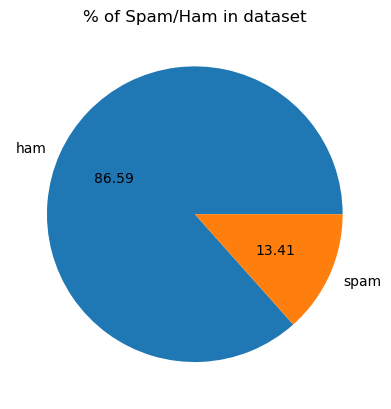

In [74]:
#data visualization 
import matplotlib.pyplot as plt
pie = plt.pie(labeled_df['Category'].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.title(r"% of Spam/Ham in dataset")
plt.show()

In [98]:
#create a new column in the dataframe that shows the len of the messages
labeled_df["len_words"] = labeled_df["Message"].apply(lambda x: len(word_tokenize(x)))
labeled_df["len_char"] = labeled_df["Message"].apply(len)
labeled_df["len_sentence"] = labeled_df["Message"].apply(lambda x: len(sent_tokenize(x)))
labeled_df

,Category,Message,transformed_msg,len_char,len_sentence,len_words
0,0,"Go until jurong point, crazy.. Available only ...","go jurong point , crazi .. avail bugi n great ...",111,2,24
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,2,37
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...","nah n't think goe usf , live around though",61,1,15
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u. u £750 pound prize ....,160,4,35
5568,0,Will ü b going to esplanade fr home?,ü b go esplanad fr home ?,36,1,9
5569,0,"Pity, * was in mood for that. So...any other s...","piti , * mood . ... suggest ?",57,2,15
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like 'd interest buy someth els ...,125,1,27


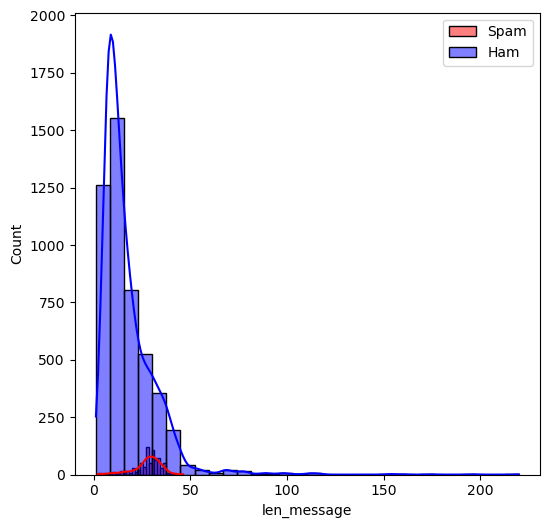

In [91]:
#create a data visualization that shows the relation betwen length and spam or not
import seaborn as sns

plt.figure(figsize=(6,6))
sns.histplot(labeled_df[labeled_df['Category'] == 1]['len_message'], color="red", label="Spam", kde=True, bins=30)
sns.histplot(labeled_df[labeled_df['Category'] == 0]['len_message'], color="blue", label="Ham", kde=True, bins=30)
plt.legend()

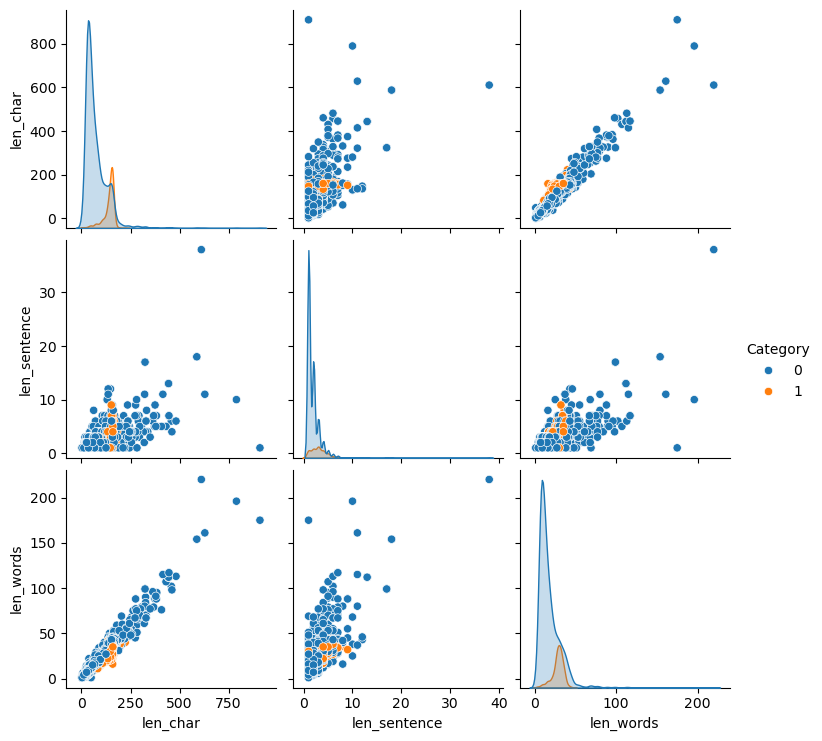

In [99]:
sns.pairplot(labeled_df, hue="Category")

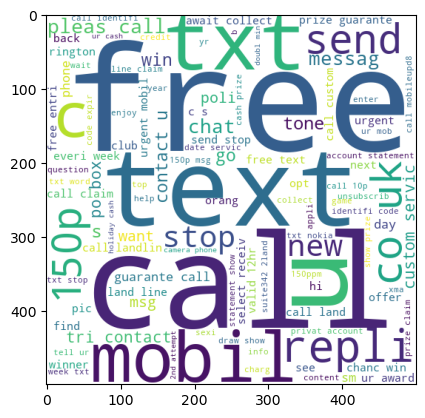

In [110]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")
spam_wc = wc.generate(labeled_df[labeled_df["Category"]==1]["transformed_msg"].str.cat(sep=" "))
plt.imshow(spam_wc)

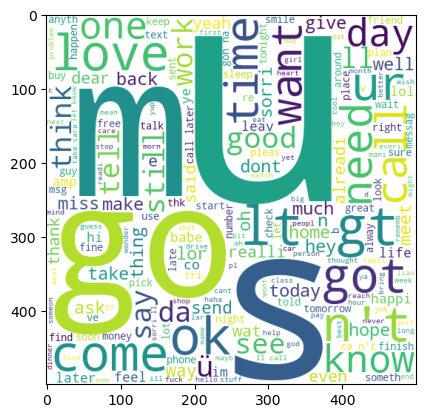

In [109]:
ham_wc = wc.generate(labeled_df[labeled_df["Category"]==0]["transformed_msg"].str.cat(sep=" "))
plt.imshow(ham_wc)